In [1]:
experimento = 'Experimento para entrenar un modelo por primera vez con las clases conflictivas MLP'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
datas = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
datas = datas.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para entrenar un modelo por primera vez con las clases conflictivas MLP 


In [8]:
#hyper parameters
    #Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
    # numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nTest = 0.2   
nSamples = 75000

nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)

input_size = 38
num_classes = 12

hidden_size = 100
num_epochs = 500
batch_size = 256
learning_rate = 0.01

num_splits = 10

class_names = ['Standing', 'Up by elevator',  'Down by elevator'] 
labels = [8,10,11]

In [9]:
# Obtengo un subconjunto del data set original 

df = datas
df = df[0:nSamples]
# df = df[nSamples:(nSamples*2)]

In [10]:
df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 31368
[18288, 7399, 5681]


<BarContainer object of 3 artists>

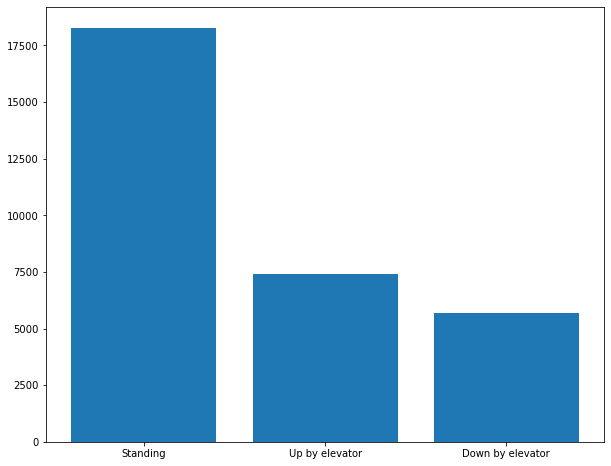

In [12]:
x_values = class_names

y_values = []

y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(10,8))
plt.bar(x_values, y_values, width=0.8)            

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
X_tensor = torch.tensor(X_test).cuda()
y_tensor = torch.tensor(y_test).cuda()
testset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [17]:
# #'modelo_final_'+str(now.date())+'_'+str(round(acc_test, 4))+'_Train'+'.zip'
# modelo_pre_train = torch.jit.load('modelo_final_2021-09-01_0.7466_Train_pt_1.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

  0%|          | 0/500 [00:00<?, ?it/s]

######### Launch with 93750 Samples, 500 Epochs, 256      Batch, 10 Splits, 12 Class, 100 Hidden neurons ######### 


loss 0.92406 acc 0.58085: 100%|██████████| 500/500 [16:23<00:00,  1.93s/it]

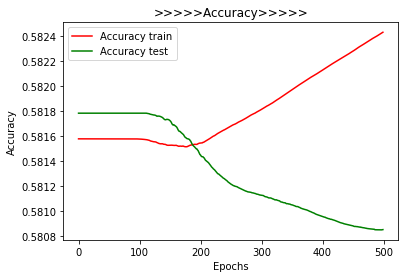

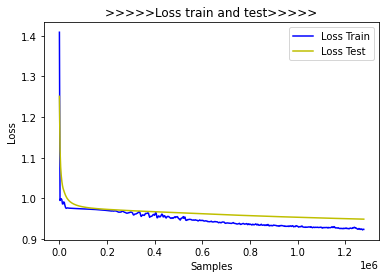

Accuracy de validación con kFold 0.579346177184466
Accuracy Train: 0.5827289391886507 
Accuracy Test: 0.5851131654446924 
Diferencia entre train y test: -0.0023842262560417327

 


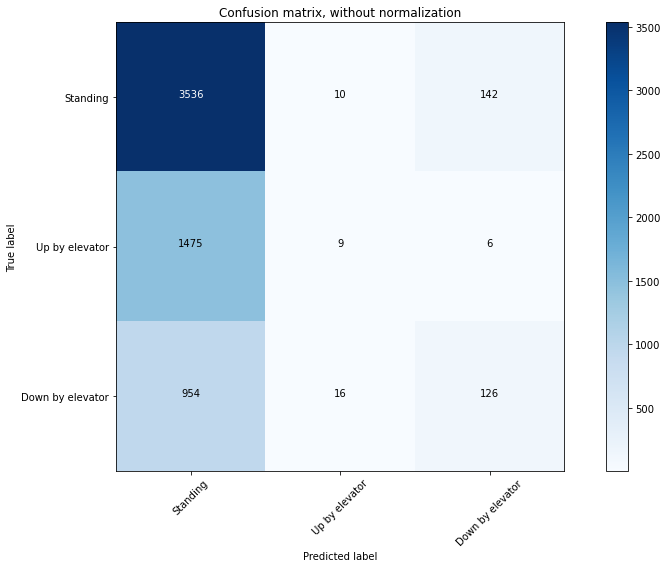

loss 0.92872 acc 0.58290: 100%|██████████| 500/500 [15:52<00:00,  1.89s/it]

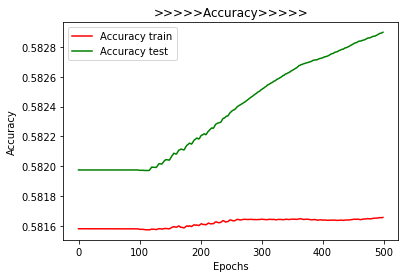

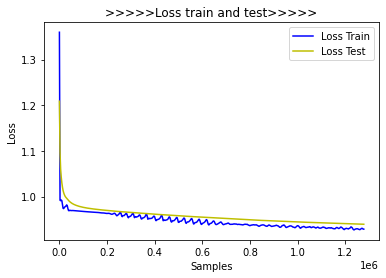

Accuracy de validación con kFold 0.582861802184466
Accuracy Train: 0.5841236949071491 
Accuracy Test: 0.5884603124003825 
Diferencia entre train y test: -0.004336617493233441

 


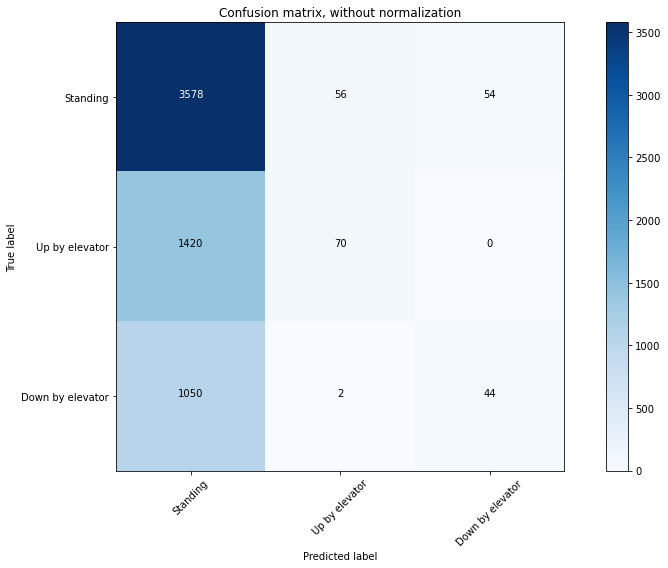

loss 0.92776 acc 0.57890: 100%|██████████| 500/500 [16:33<00:00,  2.34s/it]

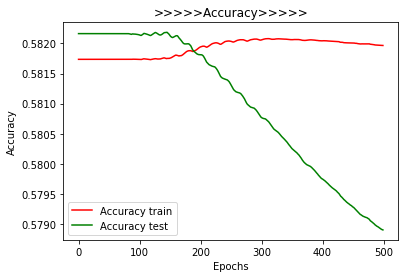

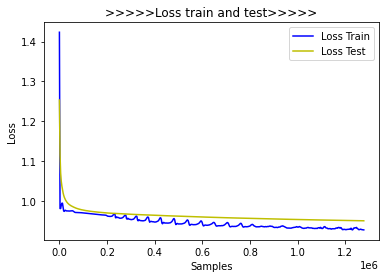

Accuracy de validación con kFold 0.580810072815534
Accuracy Train: 0.5805371802024388 
Accuracy Test: 0.5819254064392732 
Diferencia entre train y test: -0.0013882262368343223

 


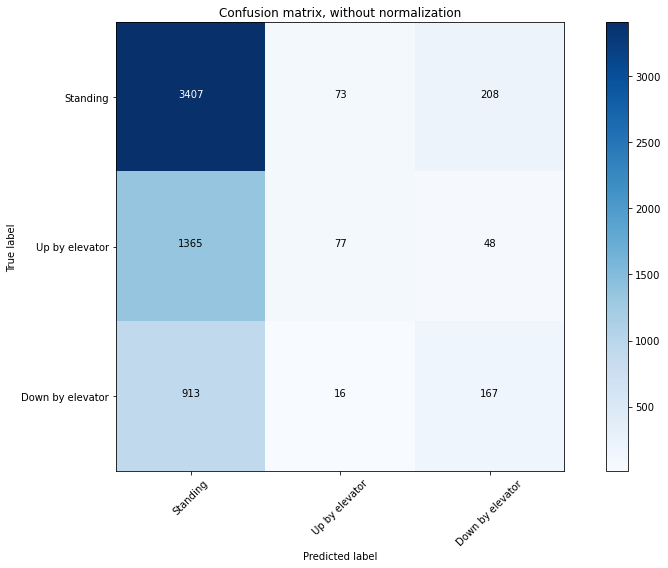

loss 0.94226 acc 0.57980: 100%|██████████| 500/500 [15:37<00:00,  1.84s/it]

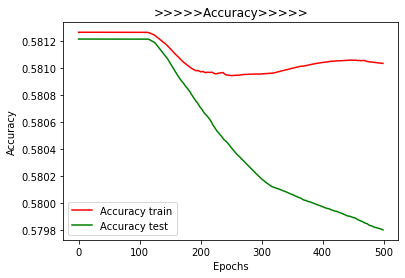

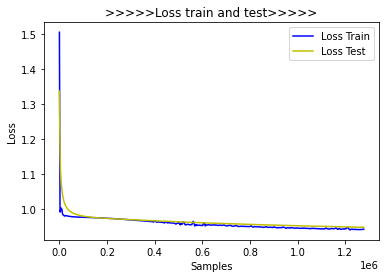

Accuracy de validación con kFold 0.5807636149878641
Accuracy Train: 0.5803777795488961 
Accuracy Test: 0.5839974497927957 
Diferencia entre train y test: -0.003619670243899531

 


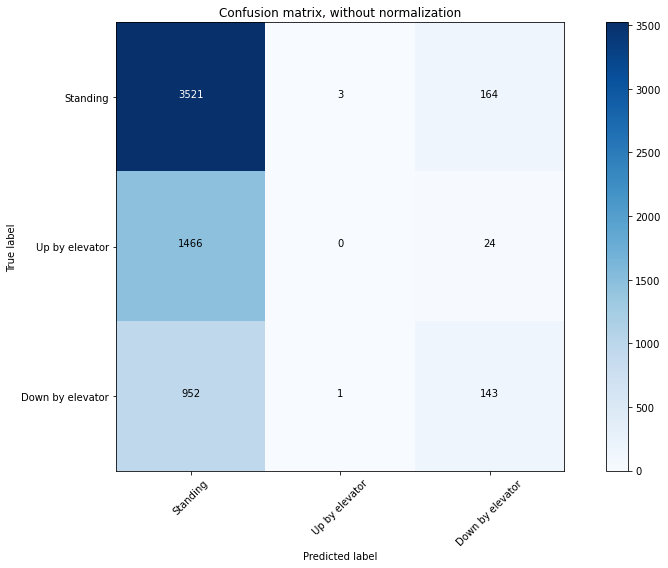

loss 0.93823 acc 0.58211: 100%|██████████| 500/500 [15:13<00:00,  1.81s/it]

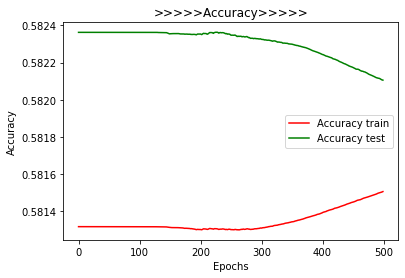

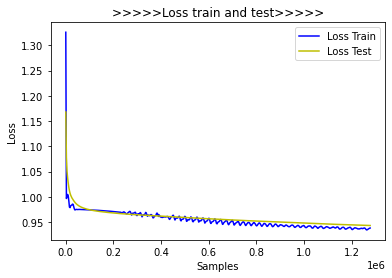

Accuracy de validación con kFold 0.5819816999171206
Accuracy Train: 0.5844424962142345 
Accuracy Test: 0.5873445967484858 
Diferencia entre train y test: -0.0029021005342513284

 


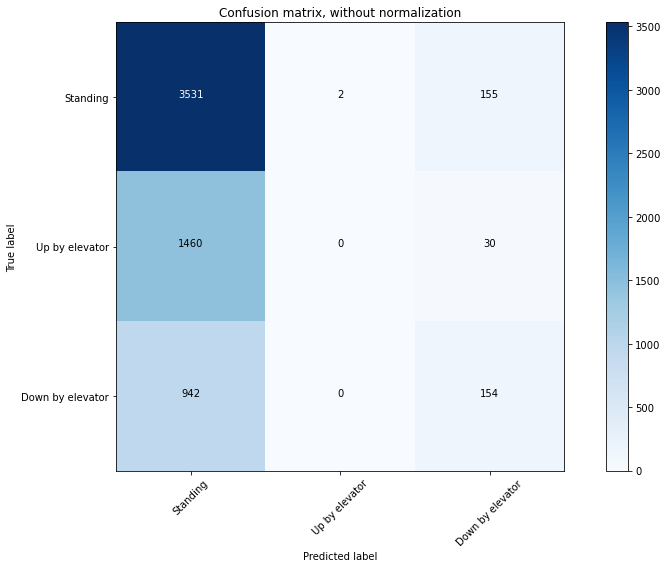

loss 0.93753 acc 0.58124: 100%|██████████| 500/500 [15:11<00:00,  1.83s/it]

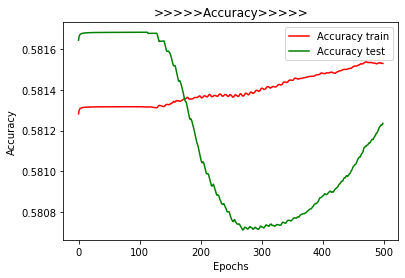

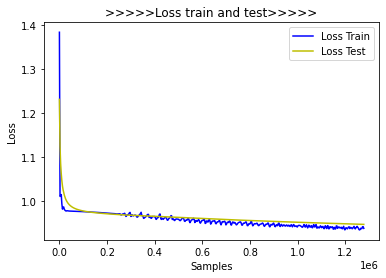

Accuracy de validación con kFold 0.5834451157845923
Accuracy Train: 0.5812943333067666 
Accuracy Test: 0.5838380618425247 
Diferencia entre train y test: -0.0025437285357581274

 


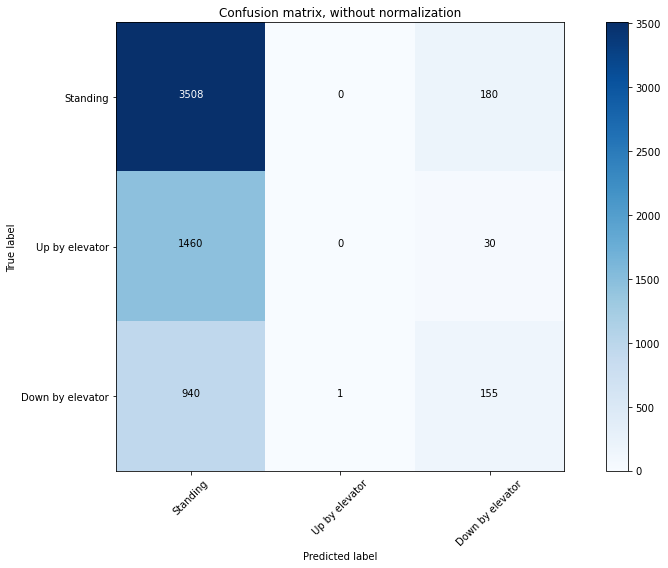

loss 0.92737 acc 0.58219: 100%|██████████| 500/500 [16:02<00:00,  2.03s/it]

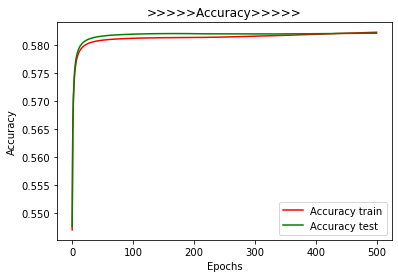

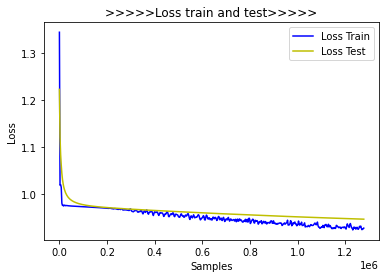

Accuracy de validación con kFold 0.5830534028153649
Accuracy Train: 0.5853590499721049 
Accuracy Test: 0.5878227605992987 
Diferencia entre train y test: -0.0024637106271938602

 


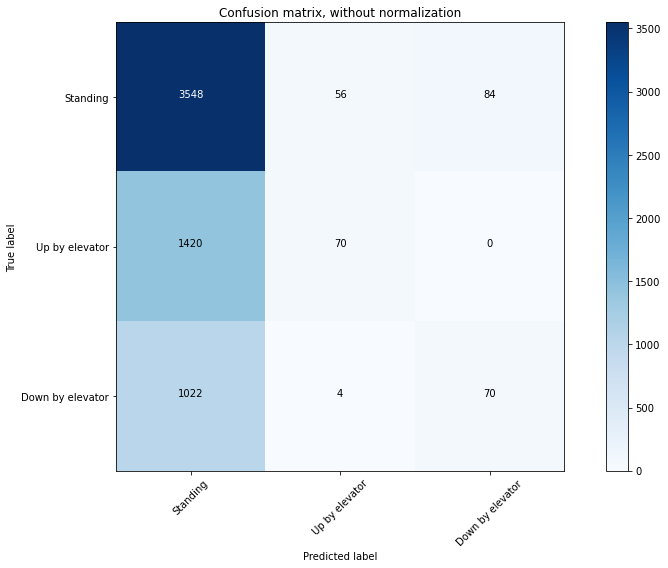

loss 0.93722 acc 0.58133: 100%|██████████| 500/500 [16:40<00:00,  1.87s/it]

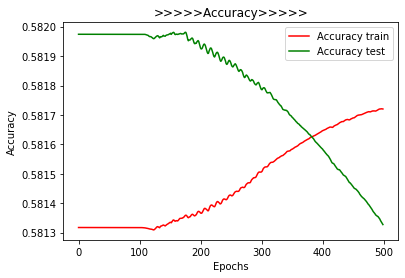

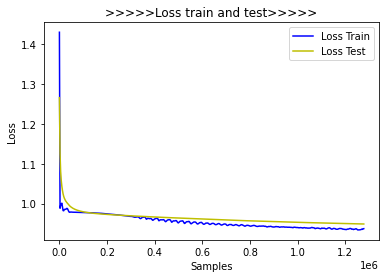

Accuracy de validación con kFold 0.5827112663353955
Accuracy Train: 0.5805770303658245 
Accuracy Test: 0.5809690787376475 
Diferencia entre train y test: -0.0003920483718229395

 


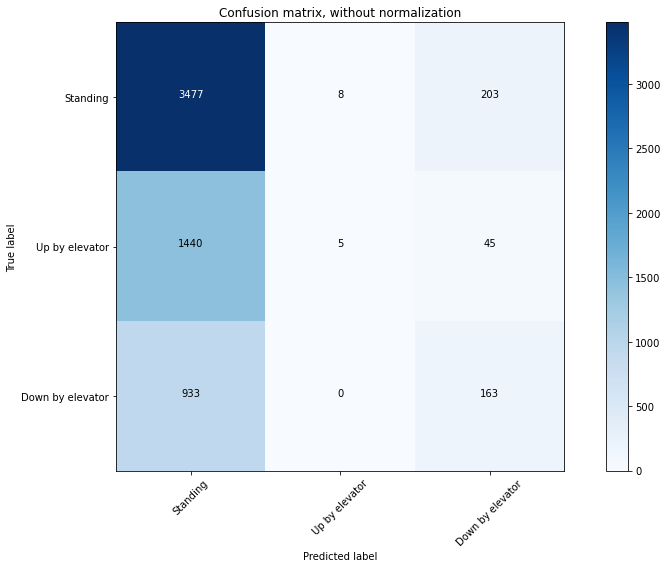

loss 0.92942 acc 0.58284: 100%|██████████| 500/500 [16:40<00:00,  2.07s/it]

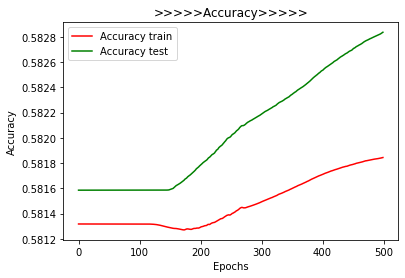

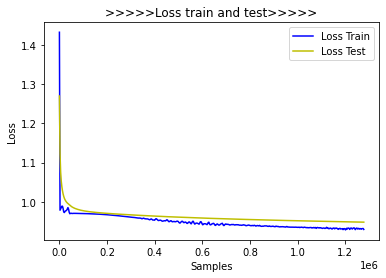

Accuracy de validación con kFold 0.5827921706856631
Accuracy Train: 0.5815334342870806 
Accuracy Test: 0.5828817341408989 
Diferencia entre train y test: -0.0013482998538183466

 


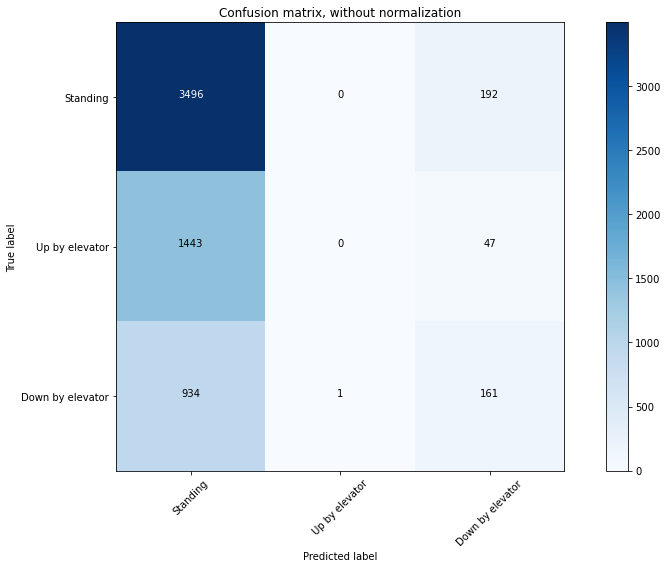

loss 0.93075 acc 0.58193: 100%|██████████| 500/500 [17:19<00:00,  2.02s/it]

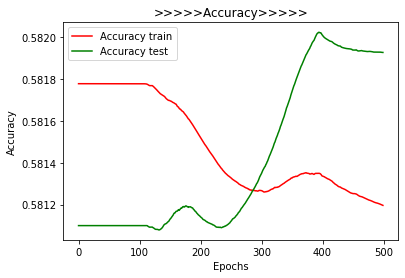

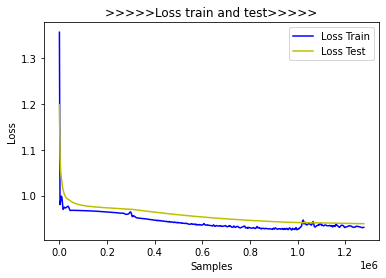

Accuracy de validación con kFold 0.5826131822756334
Accuracy Train: 0.5790228739937834 
Accuracy Test: 0.5835192859419828 
Diferencia entre train y test: -0.004496411948199386

 


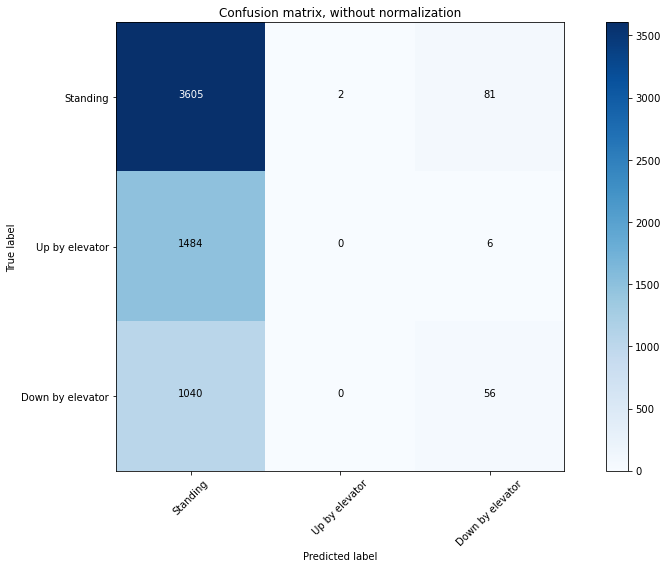

Time: 2h 41m 46s


In [18]:
print(f'\033[1;36m######### Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size}\
      Batch, {num_splits} Splits, {num_classes} Class, {hidden_size} Hidden neurons ######### \033[0;m')
#  Llamo al metodo que implementa el K-fold
time_mean, modelo_trained, loss_test_list, list_acc_test = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                               y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                               learning_rate, (X_test, y_test), modelo_pre_train, class_names, labels)

In [19]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

NameError: name 'data' is not defined

In [ ]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()